In [1]:
# Import multiprocessing
import multiprocessing as mp,os

#Import NLTK
import nltk
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize

#Import Pandas
import pandas as pd
from pandas import DataFrame

import pickle
import pprint
import matplotlib.pyplot as plt

#Import Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import feature_extraction

In [2]:
# Open Results file and load them to Results list
file = open("results_rev1.pkl",'rb')
object_file = pickle.load(file)

results = []
for item in object_file:
    results.append(item)

In [15]:
# Close file to prevent unecessary memory usage
file.close()
# Validate loaded data
import pprint
pp = pprint.PrettyPrinter(depth=1)
[' '.join(result) for result in results[0:10000]]

['sshd invalid user apple from',
 'sshd input_userauth_request invalid user apple preauth',
 'sshd pam_unix sshd auth check pass user unknown',
 'sshd pam_unix sshd auth authentication failure logname uid euid tty ssh ruser rhost',
 'sshd failed password for invalid user apple from port ssh',
 'sshd received disconnect from port bye bye preauth',
 'sshd disconnected from port preauth',
 'sshd invalid user adham from',
 'sshd input_userauth_request invalid user adham preauth',
 'sshd pam_unix sshd auth check pass user unknown',
 'sshd pam_unix sshd auth authentication failure logname uid euid tty ssh ruser rhost',
 'sshd failed password for invalid user adham from port ssh',
 'sshd received disconnect from port bye bye preauth',
 'sshd disconnected from port preauth',
 'sshd invalid user adham from',
 'sshd input_userauth_request invalid user adham preauth',
 'sshd pam_unix sshd auth check pass user unknown',
 'sshd pam_unix sshd auth authentication failure logname uid euid tty ssh ruse

In [16]:
# Create vectors using sklearn
vect = CountVectorizer(max_df=1.0, min_df=1, max_features=20)

# Note: This function need to be processed using multiprocessing
X = vect.fit_transform([' '.join(result) for result in results[0:10000]])

# Validate
print(X.toarray())
X_array = X.toarray()
print(type(X_array))
print(X_array.shape)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]
<class 'numpy.ndarray'>
(10000, 20)


In [17]:
import re

regex_str = [
#    r'<[^>]+>', # HTML tags
#    r'(?:@[\w_]+)', # @-mentions
#    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
#    r'http[s]?://(?:[a-z][$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
#    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
#    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
#    r'(?:[\w_]+)', # other words
#    r'(?:\S)' # anything else
    r'\w+'
]
#words = re.findall(r'\w+', open('hamlet.txt').read().lower())
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)

def tokenize_1(s):
    return tokens_re.findall(s)

def tokenize_2(sent):
    return [x.strip() for x in re.split(r"(?:[a-z][a-z_]+[a-z])", sent) if x.strip()]

In [18]:
# Create Dataframe
count_results = DataFrame(X_array,columns=vect.get_feature_names())
print (count_results)

      auth  authentication  bye  euid  failed  for  from  invalid  logname  \
0        0               0    0     0       0    0     1        1        0   
1        0               0    0     0       0    0     0        1        0   
2        1               0    0     0       0    0     0        0        0   
3        1               1    0     1       0    0     0        0        1   
4        0               0    0     0       1    1     1        1        0   
5        0               0    2     0       0    0     1        0        0   
6        0               0    0     0       0    0     1        0        0   
7        0               0    0     0       0    0     1        1        0   
8        0               0    0     0       0    0     0        1        0   
9        1               0    0     0       0    0     0        0        0   
10       1               1    0     1       0    0     0        0        1   
11       0               0    0     0       1    1     1        

In [19]:
count_ary = count_results.values
print (count_ary)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


In [20]:
correlation= 1-pairwise_distances(count_ary, metric='cosine')
print (correlation)

[[1.         0.75       0.56694671 ... 0.56694671 0.26726124 0.66666667]
 [0.75       1.         0.56694671 ... 0.56694671 0.26726124 0.5       ]
 [0.56694671 0.56694671 1.         ... 1.         0.60609153 0.37796447]
 ...
 [0.56694671 0.56694671 1.         ... 1.         0.60609153 0.37796447]
 [0.26726124 0.26726124 0.60609153 ... 0.60609153 1.         0.26726124]
 [0.66666667 0.5        0.37796447 ... 0.37796447 0.26726124 1.        ]]


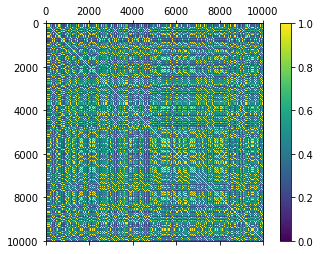

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()


In [10]:
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, stop_words="english", 
                    analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)
Xi = f.fit_transform([' '.join(result) for result in results[0:10]])

In [11]:
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df)

      adham     apple      auth      bye     check  disconnected      euid  \
0  0.000000  2.203973  0.000000  0.00000  0.000000      0.000000  0.000000   
1  0.000000  2.203973  0.000000  0.00000  0.000000      0.000000  0.000000   
2  0.000000  0.000000  2.203973  0.00000  2.609438      0.000000  0.000000   
3  0.000000  0.000000  2.203973  0.00000  0.000000      0.000000  3.302585   
4  0.000000  2.203973  0.000000  0.00000  0.000000      0.000000  0.000000   
5  0.000000  0.000000  0.000000  6.60517  0.000000      0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.00000  0.000000      3.302585  0.000000   
7  2.609438  0.000000  0.000000  0.00000  0.000000      0.000000  0.000000   
8  2.609438  0.000000  0.000000  0.00000  0.000000      0.000000  0.000000   
9  0.000000  0.000000  2.203973  0.00000  2.609438      0.000000  0.000000   

     failed   failure  input_userauth_request   invalid  pam_unix      pass  \
0  0.000000  0.000000                0.000000  1.693147  0.000

In [12]:
tfid_ary = tfid_df.values
print (tfid_ary)

[[0.         2.2039728  0.         0.         0.         0.
  0.         0.         0.         0.         1.69314718 0.
  0.         0.         0.         0.         0.         1.
  0.         1.35667494]
 [0.         2.2039728  0.         0.         0.         0.
  0.         0.         0.         2.60943791 1.69314718 0.
  0.         0.         0.         1.91629073 0.         1.
  0.         1.35667494]
 [0.         0.         2.2039728  0.         2.60943791 0.
  0.         0.         0.         0.         0.         2.2039728
  2.60943791 0.         0.         0.         0.         2.
  2.60943791 1.35667494]
 [0.         0.         2.2039728  0.         0.         0.
  3.30258509 0.         3.30258509 0.         0.         2.2039728
  0.         0.         0.         0.         2.60943791 2.
  0.         0.        ]
 [0.         2.2039728  0.         0.         0.         0.
  0.         3.30258509 0.         0.         1.69314718 0.
  0.         3.30258509 2.2039728  0.         

In [13]:
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
print (correlation)

[[1.         0.70850767 0.19697697 0.09456544 0.48975575 0.04219734
  0.06805553 0.49631777 0.36614881 0.19697697]
 [0.70850767 1.         0.13955969 0.06700034 0.3469957  0.13968452
  0.22528206 0.35164494 0.73583603 0.13955969]
 [0.19697697 0.13955969 1.         0.35138228 0.0964706  0.04572955
  0.07375224 0.18096942 0.13350668 1.        ]
 [0.09456544 0.06700034 0.35138228 1.         0.20399373 0.04215793
  0.06799196 0.08688048 0.06409439 0.35138228]
 [0.48975575 0.3469957  0.0964706  0.20399373 1.         0.1210533
  0.19523377 0.24307448 0.17932349 0.0964706 ]
 [0.04219734 0.13968452 0.04572955 0.04215793 0.1210533  1.
  0.28912648 0.03876813 0.1336261  0.04572955]
 [0.06805553 0.22528206 0.07375224 0.06799196 0.19523377 0.28912648
  1.         0.06252492 0.21551108 0.07375224]
 [0.49631777 0.35164494 0.18096942 0.08688048 0.24307448 0.03876813
  0.06252492 1.         0.73773062 0.18096942]
 [0.36614881 0.73583603 0.13350668 0.06409439 0.17932349 0.1336261
  0.21551108 0.7377306

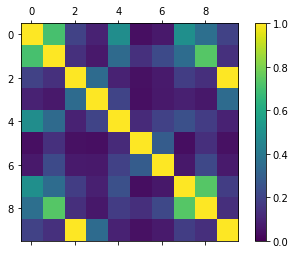

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

In [ ]:
count_all = Counter()
st_bi = []
for i in range(len(results)):
    for j in range(len(results[i])):
        trm = [term for term in re.findall(r"(?:[a-z][a-z'\-_]+[a-z])",data[i][j].lower())]
        
        for t in trigrams(trm):
            count_all[t] += 1 
            st_bi.append(term)

In [24]:
import pprint
pp = pprint.PrettyPrinter(depth=1)
[' '.join(result) for result in results[0:10]]

['sshd invalid user apple from',
 'sshd input_userauth_request invalid user apple preauth',
 'sshd pam_unix sshd auth check pass user unknown',
 'sshd pam_unix sshd auth authentication failure logname uid euid tty ssh ruser rhost',
 'sshd failed password for invalid user apple from port ssh',
 'sshd received disconnect from port bye bye preauth',
 'sshd disconnected from port preauth',
 'sshd invalid user adham from',
 'sshd input_userauth_request invalid user adham preauth',
 'sshd pam_unix sshd auth check pass user unknown']

In [26]:
import random
random_choice = random.sample(results, 1000)
#[' '.join(item) for item in random_choice]

In [28]:
print(len(random_choice))
print(type(random_choice))
print(type(random_choice[0]))

1000
<class 'list'>
<class 'list'>


In [29]:
import pickle
with open('results_test.pkl', 'wb') as f:
    pickle.dump(random_choice, f)
f.close()